# Занятие 11. Машинное обучение без учителя. Кластеризация

Хотя большинство приложений МО в наши дни основано на обучении с учителем (и как следствие именно сюда направлен основной объем инвестиций), подавляющая масса доступных данных являются непомеченными: мы имеем входные признаки $X$, но не располагаем метками $у$. 

Ученый в области компьютерных наук Ян Лекун превосходно отметил, что “если бы интеллект был тортом, то обучение без учителя было бы основой торта, обучение с учителем — сахарной глазурью на нем, а обучение с подкреплением — вишенкой на торте”. Другими словами, обучение без учителя обладает огромным потенциалом, куда мы только начали вонзать свои зубы.

Допустим, вы хотите создать систему, которая будет делать несколько фотографий каждого изделия на производственной линии и определять, какие из них дефектные. Вы можете довольно легко создать систему, которая будет автоматически делать снимки и ежедневно выдавать вам тысячи фотографий. Всего за несколько недель вы сумеете построить достаточно крупный набор данных. Но подождите, меток-то нет! Если вы пожелаете обучить обычный двоичный классификатор, который будет прогнозировать, является
изделие дефектным или нет, то вам потребуется пометить все до единого фотографии изделий как “дефектное” или “нормальное” Как правило, это будет требовать привлечения людей-экспертов, которым придется вручную перебрать все фотографии. Задача долгая, затратная и утомительная, так что она обычно будет выполняться для небольшого подмножества доступных фотографий. В результате помеченный набор данных будет довольно малым, а эффективность классификатора окажется неутешительной. Кроме того, каждый раз, когда компания вносит какие-то изменения в выпускаемые изделия, весь процесс необходимо начинать с нуля. Разве не было бы замечательно,если бы алгоритм сумел задействовать непомеченные данные, не заставляя людей помечать каждую фотографию? Вот тут на помощь и приходит обучение без учителя.

Вы уже знакомы с одним из алгоритмов машинного обучения без учителя для понижения размерности $-$ PCA. На этом занятии ознакомимся с дополнительными алгоритмами обучения без учителя и задачами, которые они могут решать.

<i>Кластеризация</i>

    Цель  заключается в группировании похожих образцов в <i>кластеры</i>. Кластеризация представляет собой великолепный инструмент для анализа данных, сегментации заказчиков, систем выдачи рекомендаций, поисковых механизмов, сегментирования изображений, частичного обучения и многого другого.
    
<i>Обнаружение аномалий</i>

    Целью является выяснение того, каким образом выглядят "нормальные" данные, с последующим применением для обнаружения ненормальных образцов, таких как дефектные изделия на производственной линии или новая тенденция во временном ряде.
    
<i>Оценка плотности</i>

    Представляет собой задачу оценки функции плотности вероятности (probability density function — PDF) случайного процесса, который генерирует набор данных. Оценка плотности часто используется для обнаружения аномалий: образцы, расположенные в областях с очень низкой плотностью, вероятнее всего будут аномалиями. Она также полезна для анализа данных и визуализации.

Мы начнем с кластеризации посредством алгоритмов K-Means (К-средние) и DBSCAN (Density-based Spatial Clustering of Applications with Noise — плоскостная пространственная кластеризация приложений с шумом), после чего обсудим модели со смесями гауссовых
распределений (Gaussian mixture model), а также посмотрим, каким образом их можно применять для оценки плотности, кластеризации и обнаружения аномалий.


## 1. Кластеризация 
Наслаждаясь прогулкой в горах, вы наталкиваетесь на растение, которого никогда не видели раньше. Вы оглядываетесь вокруг и замечаете еще несколько. Растения не идентичны, но достаточно похожи, чтобы вы знали, что почти наверняка они относятся к одному и тому же виду (или, по крайней мере, к тому же самому роду). Вам может понадобиться ботаник, который сообщит точный вид, но вам определенно не нужен эксперт для идентификации групп сходно выглядящих объектов. Прием называется <i>кластеризацией</i> (clustering): это задача опознавания похожих образцов и назначения их кластерам, или группам похожих образцов.

Кластеризация используется в разнообразных приложениях» включая перечисленные ниже.

<i>Для сегментации заказников</i>

    Вы можете кластеризировать своих заказчиков на основе их покупок и активности на вашем веб-сайте. Это полезно для понимания, кто ваши заказчики и в чем они нуждаются, так что вы сумеете адаптировать свои товары и маркетинговые кампании к каждому сегменту. Скажем, сегментация заказчиков может быть полезной в системах выдачи рекомендаций для предложения содержимого, которое понравилось другим пользователям в том же самом кластере.
    
<i>Для анализа данных</i>

    Когда вы анализируете новый набор данных, может быть полезно запустить алгоритм кластеризации и затем проанализировать каждый кластер по отдельности.
    
<i>В качестве методики понижения размерности</i>

    После кластеризации набора данных обычно появляется возможность измерить похожесть (affinity) каждого образца с каждым кластером (похожесть — это любая мера того, насколько хорошо образец подгоняется к кластеру). Затем вектор признаков х каждого экземпляра может быть заменен вектором его похожестей с кластерами. Если есть k кластеров, тогда этот вектор будет k-мерным. Обычно он будет иметь гораздо меньшую размерность, чем исходный вектор признаков, но способен предохранять достаточно информации для дальнейшей обработки.

<i>Для обнаружения аномалий</i>

    Любой образец, который имеет низкую похожесть со всеми кластерами, может быть аномалией. Например, если вы кластеризируете пользователей своего веб-сайта на основе их поведения, то сможете выявлять пользователей с необычным поведением, таким как нестандартное количество запросов в секунду. Обнаружение аномалий особенно полезно при выявлении дефектов в производстве или при обнаружении мошенничества.
    
<i>Для сегментирования изображений</i>

    За счет кластеризации пикселей в соответствии с их цветом и последующей замены цвета каждого пикселя усредненным цветом его кластера становится возможным значительное сокращение количества разных цветов в изображении. Сегментирование изображений применяется во многих системах обнаружения и отслеживания объектов, т.к. оно облегчает распознавание контуров каждого объекта.


Не существует универсального определения того, что такое кластер: это действительно зависит от контекста, и разные алгоритмы будут захватывать отличающиеся виды кластеров. Одни алгоритмы ищут образцы, центрированные возле конкретной точки, называемой центроидом. Другие занимаются поиском непрерывных областей плотно упакованных образцов: такие кластеры могут принимать любую форму. Некоторые алгоритмы являются иерархическими и ищут кластеры кластеров. Список можно продолжить.

В текущем разделе мы исследуем два популярных алгоритма кластеризации, К-Меапэ и ОВ5САЫ, а также ознакомимся с их приложениями вроде нелинейного понижения размерности, частичного обучения и обнаружения аномалий.

### 1.1 K-means
Алгоритм К-Меапв — это очень простой алгоритм, который способен выполнить кластеризацию набора данных очень быстро и эффективно, часто всего лишь за несколько итераций. Он был предложен Стюартом Ллойдом из Bell Labs в 1957 году как методика импульсно-кодовой модуляции, но опубликован за пределами компании только в 1982 году. 

Как он работает?
* Выбираем количество кластеров k, которое нам кажется оптимальным для наших данных;
* Выбираем случайным образом k точек (которые называются центроидами);
* Для каждой точки в пространстве признаков определияем, к какому центроиду она ближе;
* Перемещаем каждый центроид в центр выборки, которую мы отнесли к этому центроиду;
* Повторяем последние два шага или $n\_iter$ число раз, или когда кластеры сойдутся.

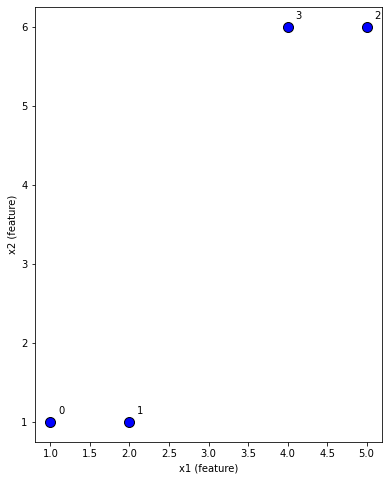

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

X = np.array([
    [1, 1],
    [2, 1],
    [5, 6],
    [4, 6]
])
plt.scatter(X[:, 0], X[:, 1], c='blue', s=100, edgecolor='black')
for idx, row in enumerate(X):
    plt.text(row[0] + 0.1, row[1] + 0.1, idx)
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)")
plt.gca().set_aspect('equal', adjustable='box')

Зададим $k$ - количество кластеров. Это параметр алгоритма.

1. Случайным образом выберем $k$ точек. Можно выбирать точки из выборки, можно взять случайные точки на плоскости в том же диапазоне.

In [3]:
centroids = np.array([[1, 5], [5, 2]])

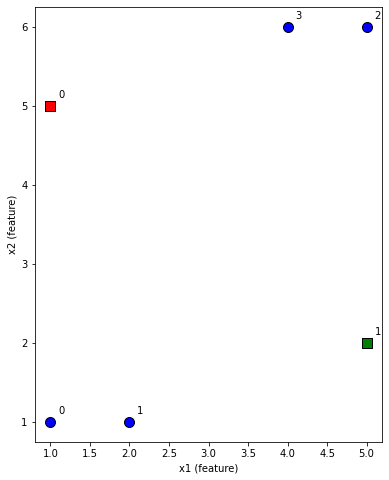

In [4]:
plt.scatter(X[:, 0], X[:, 1], c='blue', s=100, edgecolor='black')
for idx, row in enumerate(X):
    plt.text(row[0] + 0.1, row[1] + 0.1, idx)
for idx, row in enumerate(centroids):
    plt.text(row[0] + 0.1, row[1] + 0.1, idx)
plt.scatter(centroids[0, 0], centroids[0, 1], c='red', s=100, edgecolor='black', marker='s')
plt.scatter(centroids[1, 0], centroids[1, 1], c='green', s=100, edgecolor='black', marker='s')
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)")
plt.gca().set_aspect('equal', adjustable='box')

  2 . каждой точке проставим метку кластера - ближайший к ней центроид

In [5]:
from scipy.spatial.distance import cdist
labels = cdist(X, centroids).argmin(axis=1)
print(labels)

[0 1 1 0]


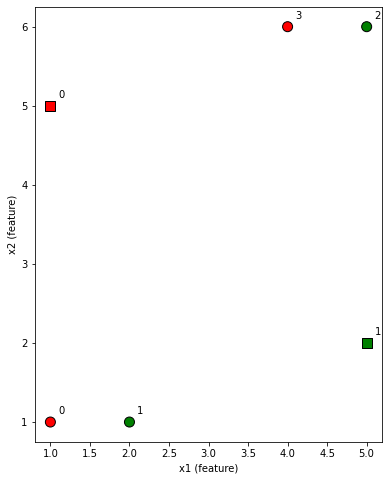

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=['green' if l else 'red' for l in labels], s=100, edgecolor='black')
for idx, row in enumerate(X):
    plt.text(row[0] + 0.1, row[1] + 0.1, idx)
for idx, row in enumerate(centroids):
    plt.text(row[0] + 0.1, row[1] + 0.1, idx)
plt.scatter(centroids[0, 0], centroids[0, 1], c='red', s=100, edgecolor='black', marker='s')
plt.scatter(centroids[1, 0], centroids[1, 1], c='green', s=100, edgecolor='black', marker='s')
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)")
plt.gca().set_aspect('equal', adjustable='box')

3 . Обновим координаты центров кластеров (центроидов).
Для этого возьмем точки, отнесенные к центроиду на предыдущем шаге, и посчитаем среднее по каждой координате (центр масс).

In [7]:
centroids =  np.array([X[labels == 0].mean(axis=0), X[labels == 1].mean(axis=0)])

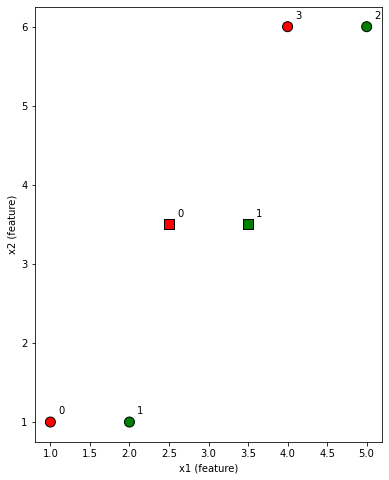

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=['green' if l else 'red' for l in labels], s=100, edgecolor='black')
for idx, row in enumerate(X):
    plt.text(row[0] + 0.1, row[1] + 0.1, idx)
for idx, row in enumerate(centroids):
    plt.text(row[0] + 0.1, row[1] + 0.1, idx)
plt.scatter(centroids[0, 0], centroids[0, 1], c='red', s=100, edgecolor='black', marker='s')
plt.scatter(centroids[1, 0], centroids[1, 1], c='green', s=100, edgecolor='black', marker='s')
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)")
plt.gca().set_aspect('equal', adjustable='box')

4 . Будем повторять шаги 2 и 3, пока не достигнем сходимости (пока центры не перестанут изменяться значительно).

In [9]:
from scipy.spatial.distance import cdist
labels = cdist(X, centroids).argmin(axis=1)
print(labels)

[0 0 1 1]


In [10]:
centroids =  np.array([X[labels == 0].mean(axis=0), X[labels == 1].mean(axis=0)])

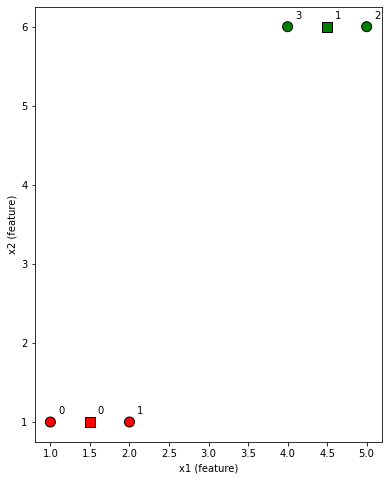

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=['green' if l else 'red' for l in labels], s=100, edgecolor='black')
for idx, row in enumerate(X):
    plt.text(row[0] + 0.1, row[1] + 0.1, idx)
for idx, row in enumerate(centroids):
    plt.text(row[0] + 0.1, row[1] + 0.1, idx)
plt.scatter(centroids[0, 0], centroids[0, 1], c='red', s=100, edgecolor='black', marker='s')
plt.scatter(centroids[1, 0], centroids[1, 1], c='green', s=100, edgecolor='black', marker='s')
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)")
plt.gca().set_aspect('equal', adjustable='box')

In [12]:
labels = cdist(X, centroids).argmin(axis=1)
print(labels)

[0 0 1 1]


Хотя алгоритм гарантированно сходится, он может не сойтись в правильное решение (т.е. сойтись в локальный оптимум): все зависит от инициализации центроидов.

До сих пор мы устанавливали количество кластеров к в 2, поскольку по данным было видно, что это корректное значение. Но в общем случае будет нелегко узнать, каким образом устанавливать к, а результат может оказаться довольно плохим, если установить к в неверное значение.

#### Подбор $k$ $-$ метод локтя

Выбрать критерий качества кластеризации и построить его значение для $K = 1, 2, . . .$

Text(0, 0.5, 'x2 (feature)')

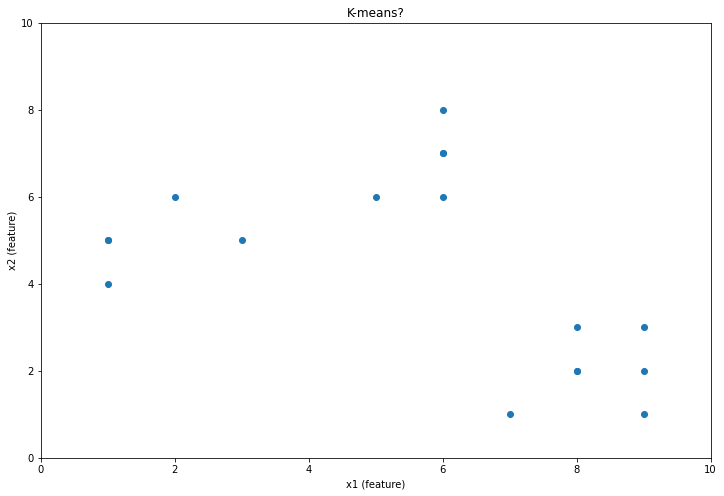

In [13]:
from sklearn.cluster import KMeans
from sklearn import metrics

X = np.array([
    [3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8],
    [5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3]
]).T

plt.scatter(X[:,0], X[:,1]);
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.title("K-means?")
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)")

Одно из решений предусматривает многократный запуск алгоритма с разными случайными инициализациями и сохранение наилучшего решения. Количество случайных инициализаций управляется гиперпараметром n_init: по умолчанию он равен 10 , т.е. при вызове fit() описанный ранее полный алгоритм выполняется 10 раз и библиотека Scikit-Learn сохраняет наилучшее решение.

Но как в точности она узнает, какое решение является наилучшим? Библиотека использует показатель эффективности! Такой показатель называется <i>инерцией</i> модели, которая представляет собой среднеквадратическое расстояние между каждым образцом и его ближайшим центроидом. 

Однако при попытке выбора $k$ инерция не является подходящим показателем эффективности, потому что с ростом $k$ она продолжает уменьшаться. На самом деле, чем больше кластеров, тем ближе будет каждый образец к своему ближайшему центроиду и, следовательно, тем ниже будет инерция. Давайте вычертим график инерции как функции количества кластеров $k$.

Text(0.5, 1.0, 'Метод локтя показывает оптимальное k')

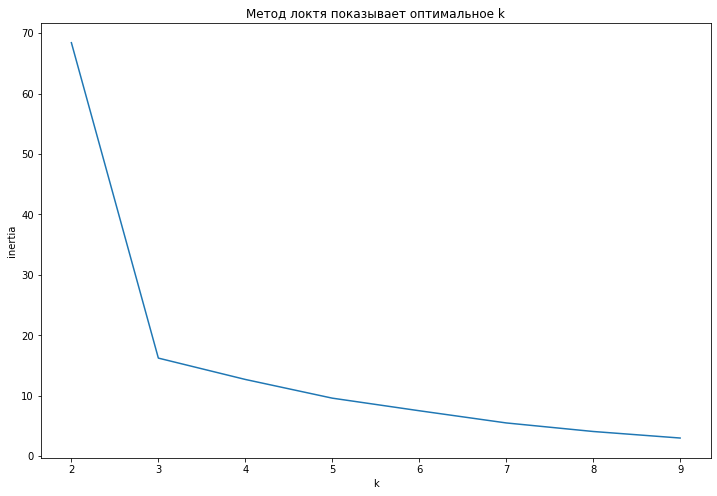

In [22]:
inertia = []
k = range(2, 10)
for k_i in k:
    km = KMeans(n_clusters=k_i)
    km.fit(X)
    inertia.append(km.inertia_)
    
plt.plot(k, inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Метод локтя показывает оптимальное k')

Как видите, инерция очень быстро падает при увеличении $k$ вплоть до 3, но затем при дальнейшем росте $k$ уменьшается гораздо медленнее. По форме кривая напоминает руку, имеющую “локоть” в точке $k = 3$.

Итак, если бы мы не знали лучший вариант, то 3 было бы хорошим выбором: любое более низкое значение окажется неподходящим, в то время как любое более высокое значение не особо поможет — мы бы просто разделяли вполне нормальные кластеры пополам без веской причины.

Такая методика выбора наилучшего значения для количества кластеров является довольно грубой. Более точный подход (но более затратный с точки зрения вычислений) предусматривает использование оценки силуэта (silhouette score), которая представляет собой средний коэффициент силуэта (silhouette coefficient) по всем образцам. 

Коэффициент силуэта образца равен (b - а) / max(a, b), где а — среднее расстояние до других образцов в том же самом кластере (т.е. среднее внутрикластерное расстояние) и b — среднее расстояние до ближайшего кластера (т.е. среднее расстояние до образцов следующего ближе всех расположенного кластера, определяемого как тот, который минимизирует Ь, исключая собственный кластер образца). Коэффициент силуэта может варьироваться между -1 и +1. Коэффициент, близкий к +1, означает, что образец находится внутри своего кластера и далеко от других кластеров; коэффициент, близкий к 0, говорит о том, что образец расположен близко к границе кластера; коэффициент, близкий к - 1, указывает на то, что образец мог быть назначен ошибочному кластеру.

Для вычисления оценки силуэта можно применять функцию silhouette_score() из Scikit-Learn, предоставив ей все образцы в наборе данных и метки, которые были назначены:

Text(0.5, 1.0, 'Метод локтя показывает оптимальное k')

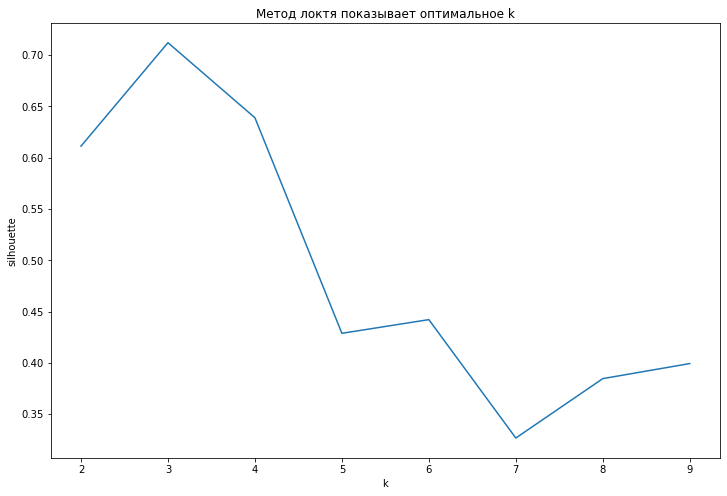

In [23]:
from sklearn.metrics import silhouette_score
silhouette = []
k = range(2, 10)
for k_i in k:
    km = KMeans(n_clusters=k_i).fit(X)
    km.fit(X)
    silhouette.append(silhouette_score(X, km.labels_))
    
plt.plot(k, silhouette)
plt.xlabel('k')
plt.ylabel('silhouette')
plt.title('Метод локтя показывает оптимальное k')

### 1.2 DBSCAN
Алгоритм DBSCAN определяет кластеры как непрерывные области высокой плотности. Ниже описана его работа.

* Для каждого образца алгоритм подсчитывает количество образцов, расположенных в рамках небольшого расстояния $\epsilon$ (эпсилон) от него. Такая область называется $\epsilon$-соседством экземпляра;

* Если образец имеет, по крайней мере, min_sam ples образцов в своем $\epsilon$-соседстве (включая себя), тогда он считается центральным образцом. Другими словами, центральные образцы — это такие образцы, которые расположены в плотных областях;

* Все образцы в соседстве центрального образца принадлежат тому же самому кластеру. Это соседство может включать другие центральные образцы; таким образом, длинная последовательность соседствующих центральных образцов формирует одиночный кластер;

* Любой образец, не являющийся центральным и не имеющий такового в своем соседстве, считается аномалией.

![alt text](https://upload.wikimedia.org/wikipedia/commons/a/af/DBSCAN-Illustration.svg)

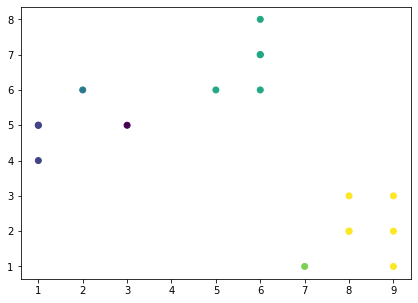

In [24]:
from sklearn.cluster import DBSCAN

X = np.array([
    [3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8],
    [5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3]
]).T


def dbscan_demo(eps=1, min_pts=1):
    dbscan = DBSCAN(eps=eps, min_samples=min_pts).fit(X)
    labels = dbscan.labels_
    plt.figure(figsize=(7, 5))
    plt.scatter(X[:, 0], X[:, 1], c=labels)

    
dbscan_demo()

## 2. Поиск аномалий в данных
![](https://i.pinimg.com/originals/e5/c4/0d/e5c40dd06a9cdda2ac88101897606543.gif)

### 2.1 Зачем вообще искать аномалии?
- Предобработка данных: убираем выбросы, чтобы не переобучиться
- Анализ выбросов: хотим найти, понять и обезвредить
- Поиск аномалий как самоцель

**Поиск аномалий** может быть как конечной целью анализа и построения моделей, так и промежуточным этапом подготовки и очистки данных. В первом сценарии мы хотим научиться для каждого объекта выборки выносить вердикт, является ли он аномальным/нестандартным, а во-втором мы находим и убираем выбросы в данных, чтобы в дальнейшем получить более устойчивые модели. 

В [определении](https://scikit-learn.org/stable/modules/outlier_detection.html) из документации scikit-learn, здача поиска аномалий разделяется на два возможных типа:

- **Outlier detection** (поиск выбросов): в тренировочной выборке содержатся выбросы, которые определяются как наблюдения, лежащие далеко от остальных. Таким образом, алгоритмы для детектирования выбросов пытаются найти регионы, где сосредоточена основная масса тренировочных данных, игрорируя аномальные наблюдения.
- **Novelty detection** (поиск "новизны"): тренировочная выборка не загрязнена выбросами, и мы хотим научиться отвечать на вопрос "является ли новое наблюдение выбросом". 


### 2.2 Сложности при поиске аномалий
На практике задача поиска аномалий зачастую не сводится к построению бинарного классификатора "выброс/не выброс". Реальные данные редко бывают размечены и мы вынуждены использовать методы обучения без учителя. 

Одновременно с этим возникает вопрос о построении надежной схемы валидации, ведь если "правильных ответов" у нас нет, то и понять, насколько алгоритм справляется со своей задачей, уже сложнее. Здесь очень помогут экспертные оценки о проценте аномальных объектов, которые ожидаются в выборке, так как с ними можно будет сравнивать прогнозные значения и варьировать тем самым чувствительность алгоритмов. 

Если же поиск и очистка от аномалий - это шаг в подготовке данных для последующего моделирования, то можно использовать стандартные подходы: разбиение на train/test, кросс-валидацию и т.д. Конечно, чтобы избежать переобучения, очистка в этом случае должна проводиться только на тренировочной части датасета.

### 2.3 Какие методы использовать?
Самые простые методы поиска аномалий/выбросов:
- Визуально: по гистограммам, скаттерплотам, боксплотам;
- Базовые статистики - отклонение от среднего, перцентили, квантили;
- Статистические тесты, те самые 3 сигмы.

Но есть методы посложнее:
- Distance-based: находим центроиды/средние/кластеры "хороших" наблюдений и считаем расстояние до них, если расстояние больше некоторого порогового значения - аномалия 


- Density-based: похожее, но по вероятностям/плотностям, если плотность ниже порога - аномалия (DBSCAN);


- Model-based: строим модельки, а они уже разберутся:
    - Линейные методы: пытаемся построить некоторую линейную разделяющую гиперплоскость между "хорошими" и "аномальными значениями" (One-Class SVM)
    - Деревянные методы: строим решающее дерево, чтобы понять, сколько раз пришлось делить выборку, чтобы добраться до конкретной точки (Isolation Forest https://quantdare.com/isolation-forest-algorithm/)
    - Deep-learning: строим сжатую репрезентацию наших данных (autoencoders) и дальше используем distance/density/models подход на подготовленных данных